In [1]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('./yelp-text-by-stars.csv',sep=';',encoding="ISO-8859-1")
data.head(3)

,Stars,Text
0,1,Boarded my English Mastiff here over New Year'...
1,1,Another case of the Emperor's New Clothes. So...
2,1,Came on Valentine's Day night having pre-bough...


In [4]:
corpus=data['Text']

In [5]:
import gensim

In [6]:
corpus = corpus.apply(lambda line : gensim.utils.simple_preprocess((line)))

In [7]:
corpus[0]

['boarded',
 'my',
 'english',
 'mastiff',
 'here',
 'over',
 'new',
 'year',
 'they',
 're',
 'closed',
 'on',
 'sunday',
 'so',
 'even',
 'though',
 'we',
 'got',
 'home',
 'on',
 'sunday',
 'we',
 'had',
 'to',
 'leave',
 'him',
 'here',
 'another',
 'day',
 'and',
 'pay',
 'for',
 'another',
 'day',
 'because',
 'we',
 'couldn',
 'pick',
 'him',
 'up',
 'until',
 'monday',
 'morning',
 'he',
 'got',
 'complimentary',
 'bath',
 'with',
 'his',
 'boarding',
 'when',
 'did',
 'pick',
 'him',
 'up',
 'once',
 'got',
 'him',
 'in',
 'the',
 'car',
 'noticed',
 'very',
 'pungent',
 'musky',
 'odor',
 'couldn',
 'figure',
 'out',
 'what',
 'it',
 'was',
 'until',
 'got',
 'him',
 'home',
 'the',
 'smell',
 'was',
 'so',
 'bad',
 'had',
 'to',
 'leave',
 'the',
 'car',
 'windows',
 'open',
 'to',
 'air',
 'it',
 'out',
 'he',
 'had',
 'greenish',
 'material',
 'on',
 'the',
 'underside',
 'of',
 'his',
 'tail',
 'and',
 'around',
 'his',
 'butt',
 'tried',
 'to',
 'clean',
 'it',
 'off',
 

## Apprentissage du Word2vec

In [8]:
import multiprocessing
cores=multiprocessing.cpu_count()
cores

10

In [9]:
model_size=100
model=gensim.models.Word2Vec(corpus,vector_size=model_size,sg=0,window=5,min_count=2,workers=cores-1)

In [10]:
for i in range(100):
    model.train(corpus,total_examples=len(corpus),epochs=1)
    print('Train ',i)

Train  0
Train  1
Train  2
Train  3
Train  4
Train  5
Train  6
Train  7
Train  8
Train  9
Train  10
Train  11
Train  12
Train  13
Train  14
Train  15
Train  16
Train  17
Train  18
Train  19
Train  20
Train  21
Train  22
Train  23
Train  24
Train  25
Train  26
Train  27
Train  28
Train  29
Train  30
Train  31
Train  32
Train  33
Train  34
Train  35
Train  36
Train  37
Train  38
Train  39
Train  40
Train  41
Train  42
Train  43
Train  44
Train  45
Train  46
Train  47
Train  48
Train  49
Train  50
Train  51
Train  52
Train  53
Train  54
Train  55
Train  56
Train  57
Train  58
Train  59
Train  60
Train  61
Train  62
Train  63
Train  64
Train  65
Train  66
Train  67
Train  68
Train  69
Train  70
Train  71
Train  72
Train  73
Train  74
Train  75
Train  76
Train  77
Train  78
Train  79
Train  80
Train  81
Train  82
Train  83
Train  84
Train  85
Train  86
Train  87
Train  88
Train  89
Train  90
Train  91
Train  92
Train  93
Train  94
Train  95
Train  96
Train  97
Train  98
Train  99


In [12]:
model.save('./Word2vec_entraine.h5')

In [13]:
len(model.wv.index_to_key)

34269

In [22]:
model.wv['pizza']

array([-1.1132286 ,  0.88907325, -0.76900494,  3.0945382 ,  1.9754488 ,
       -1.4506348 , -1.2465173 ,  1.0702122 , -1.202994  , -0.28025812,
        2.9418771 ,  0.5535008 , -1.9919705 ,  0.9769652 , -1.3271221 ,
       -0.6573523 ,  0.15201561,  1.7210815 ,  0.3140488 , -2.7069974 ,
       -1.6598122 , -0.91288215,  0.10608316, -1.0514708 , -1.2377706 ,
       -0.00919638, -1.2971258 ,  0.0041127 , -1.6795038 ,  0.7178946 ,
        2.065859  , -0.5270369 , -3.0489724 ,  0.62367994,  0.09044292,
        2.5999389 ,  0.10706328, -1.8312508 , -1.5624075 , -1.1841589 ,
       -2.2552629 , -3.1690724 , -2.2455165 , -0.3629483 , -0.20502882,
        0.638871  ,  0.5233155 , -1.0464172 ,  1.8028264 ,  1.3187138 ,
       -0.22497979,  0.54995495, -0.59733874,  0.6788405 ,  0.8757907 ,
       -0.8025131 , -1.6385694 ,  0.00672314,  0.8923768 ,  0.23010187,
       -0.20283434,  1.3660417 , -0.29337195, -0.455282  ,  0.2792727 ,
       -1.5514607 ,  1.1733692 , -1.6073308 , -1.4904046 , -0.83

In [14]:
model.wv.most_similar(positive='pizza',topn=10)

[('pizzas', 0.6713647842407227),
 ('crust', 0.6703757047653198),
 ('pepperoni', 0.631842315196991),
 ('margherita', 0.598074734210968),
 ('calzone', 0.5699673891067505),
 ('burger', 0.562964916229248),
 ('mozzarella', 0.5274617075920105),
 ('hoagie', 0.5274242758750916),
 ('pizzeria', 0.5260688662528992),
 ('subs', 0.5209154486656189)]

In [15]:
model.wv.doesnt_match(['food','drink','play'])

'play'

In [16]:
model.wv.most_similar(positive=['king','woman'],negative=['man'],topn=1)

[('queen', 0.540101170539856)]

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


def tsnescatterplot(model, word, list_names, model_size):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    
    if (model_size>300):
        model_size=300
    
    arrays = np.empty((0, model_size), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from model_size to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

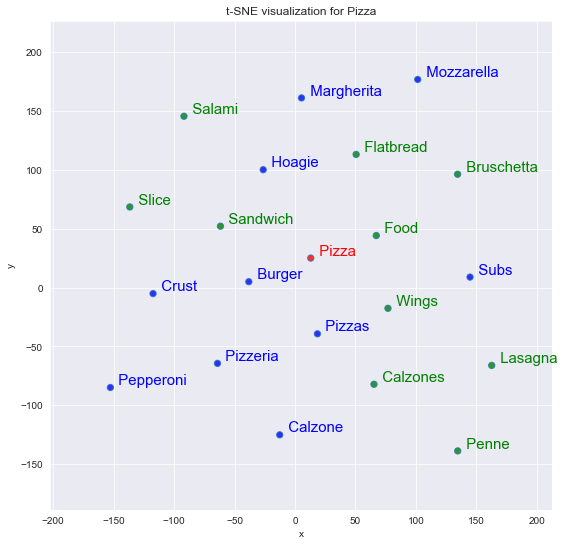

In [19]:
word_tested='pizza'
tsnescatterplot(model, word_tested,[t[0] for t in 
                                    model.wv.most_similar(positive=word_tested,topn=20)[10:]] , model_size)

In [21]:
model.wv['girl']

array([ 2.114941  ,  1.7405567 ,  1.0479884 ,  0.8195359 , -2.0740836 ,
       -0.5904873 ,  1.7748052 ,  0.96477515, -0.26693067, -0.548371  ,
        1.4569821 , -0.7096443 ,  1.8645948 , -3.5398965 ,  1.1087042 ,
       -0.6337134 ,  0.09737752,  2.1494136 , -1.9770937 ,  2.4007778 ,
       -2.7709377 , -1.492022  , -1.3791869 ,  2.3775165 , -0.38916662,
        0.19146429, -1.3550724 ,  0.33787838,  0.20133173,  1.0987437 ,
        1.551679  ,  1.7484385 ,  1.9383335 , -0.20707628,  0.8469508 ,
        1.4699601 ,  0.06700949, -0.83773065,  1.6650397 ,  1.6114835 ,
        0.01724692, -0.6608528 ,  0.34473574, -1.1045163 ,  0.14708929,
        0.13009591,  1.7795886 , -0.21721976,  1.559095  ,  2.0727139 ,
        1.039997  ,  0.8509295 ,  0.51720244,  1.950221  , -1.7427878 ,
        0.51921964,  0.4417985 ,  0.6634163 ,  0.8942898 , -0.01640121,
       -1.3177127 ,  1.3987502 ,  0.26775807, -0.33147636,  3.2105896 ,
        0.53250265,  3.829558  ,  0.7013205 ,  1.032871  , -1.04